In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier



In [2]:
#daten importieren und vorbereiten 
data = pd.read_csv('Homework-ML4_2-Data.csv')
data['Fehler'] = pd.Series(np.where(data.Fehler.values == 'YES', 1, 0), data.index)
data.drop(['Typ', 'Anl', 'Nr.'], axis=1, inplace=True)
data

,Temp.,Druck,Füllst.,Fehler
0,244,140,4600,0
1,200,130,4300,0
2,245,108,4100,1
3,250,112,4100,0
4,200,107,4200,0
5,272,170,4400,1
6,265,105,4100,0
7,248,138,4800,1
8,200,194,4500,1


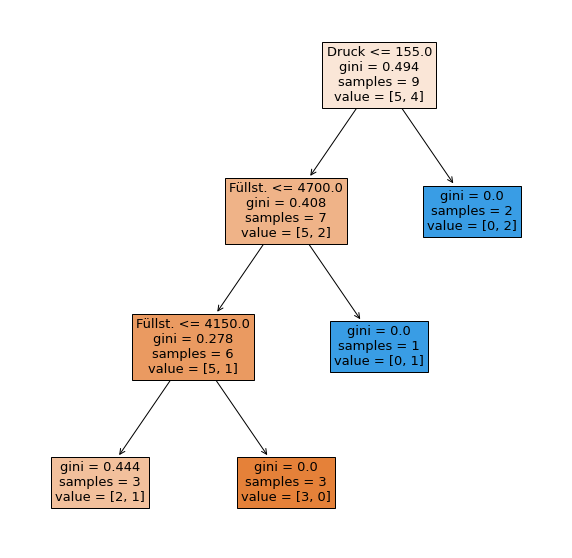

In [3]:
features = ['Temp.', 'Druck', 'Füllst.']
X = data[features]
y = data.Fehler
crv = DecisionTreeClassifier(max_depth=3, criterion='gini')
crv.fit(X,y)
y_pred = crv.predict(X)
fig = plt.figure()
fig.set_size_inches(10,10)
tree_plot = plot_tree(crv, filled=True, 
    feature_names=features, fontsize=13)
plt.show()

In [4]:
"""
Berechnet die Gini Indizes und gibt sie für die angegebene Spalte als Liste zurück
"""
def gini(data, split_points, col):
    ges = len(data.index)
    gini_ind = []
    for x in split_points.index:
        high = data[data[col] >= split_points[col][x]].count()[col]
        high_n = data[(data[col] >= split_points[col][x]) & 
            (data['Fehler'] == 0)].count()[col]
        low = data[data[col] < split_points[col][x]].count()[col]
        low_n = data[(data[col] < split_points[col][x]) & 
            (data['Fehler'] == 0)].count()[col]
        if(low != 0):
            g_low = low/ges*(1-((low-low_n)/low)**2-(low_n/low)**2)
        else:
            g_low = 0
        g_high = high/ges*(1-((high-high_n)/high)**2-(high_n/high)**2)
        gini_ind.append(g_high+g_low)
    return(gini_ind)

In [5]:
"""
findet den nächsten Knotenpunkt, gibt ihn aus und gibt
den Wert und die spalte des betroffenen Wertes zurück
"""
def get_node(data, test_col):
    gini_table = pd.DataFrame()
    split_points = pd.DataFrame()
    low_gini = 1

    for col in data.columns:
        if(col != test_col):
            sorted_data = data.sort_values(by=col, ignore_index=True)
            for x in range(1, len(sorted_data)):
                split_points.at[x-1, col] = (sorted_data[col][x-1] + 
                    sorted_data[col][x]) / 2
            gini_table[col] = gini(sorted_data, split_points, col)
            if(gini_table[col].min() < low_gini):
                low_gini = gini_table[col].min()
                node_col = col
                node_val = split_points[col][gini_table[col].idxmin()]

    print(split_points)
    print(gini_table)
    print(node_col, node_val)
    return (node_val, node_col)

In [6]:
def tree(data, test_col):
    l_data = data.copy()
    while(len(l_data.columns) > 1 and not l_data.empty):
        node = get_node(l_data, test_col)
        l_data.drop(index = l_data[l_data[node[1]] >= 
            node[0]].index, inplace = True)
        l_data.drop(columns = node[1], inplace = True)
        l_data.reset_index(drop = True, inplace = True)
    return

In [7]:
tree(data, 'Fehler')

   Temp.  Druck  Füllst.
0  200.0  106.0   4100.0
1  200.0  107.5   4100.0
2  222.0  110.0   4150.0
3  244.5  121.0   4250.0
4  246.5  134.0   4350.0
5  249.0  139.0   4450.0
6  257.5  155.0   4550.0
7  268.5  182.0   4700.0
      Temp.     Druck   Füllst.
0  0.493827  0.444444  0.493827
1  0.493827  0.380952  0.493827
2  0.481481  0.481481  0.481481
3  0.433333  0.433333  0.433333
4  0.488889  0.344444  0.344444
5  0.481481  0.444444  0.444444
6  0.492063  0.317460  0.492063
7  0.416667  0.416667  0.416667
Druck 155.0
   Temp.  Füllst.
0  200.0   4100.0
1  222.0   4100.0
2  244.5   4150.0
3  246.5   4250.0
4  249.0   4450.0
5  257.5   4700.0
      Temp.   Füllst.
0  0.408163  0.408163
1  0.342857  0.408163
2  0.285714  0.404762
3  0.404762  0.404762
4  0.342857  0.371429
5  0.380952  0.238095
Füllst. 4700.0
   Temp.
0  200.0
1  222.0
2  244.5
3  247.5
4  257.5
      Temp.
0  0.277778
1  0.250000
2  0.222222
3  0.250000
4  0.266667
Temp. 244.5
